In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

Local_path='/home/jmdeloui/STL_dev/STL_main'
sys.path.append(Local_path)

from STL_2D_Kernel_Torch import STL_2D_Kernel_Torch as DataClass
from ST_Operator import ST_Operator as SO
from Synthesis import optimize_scattering_LBFGS

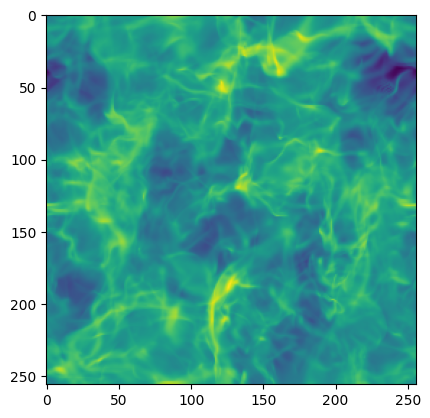

In [2]:
nside=128

im=np.load(Local_path+'/Certif_2D_Kernel_Torch/Turb_6.npy')[0]
data=DataClass(im)
plt.imshow(im)

# test wavelet computation

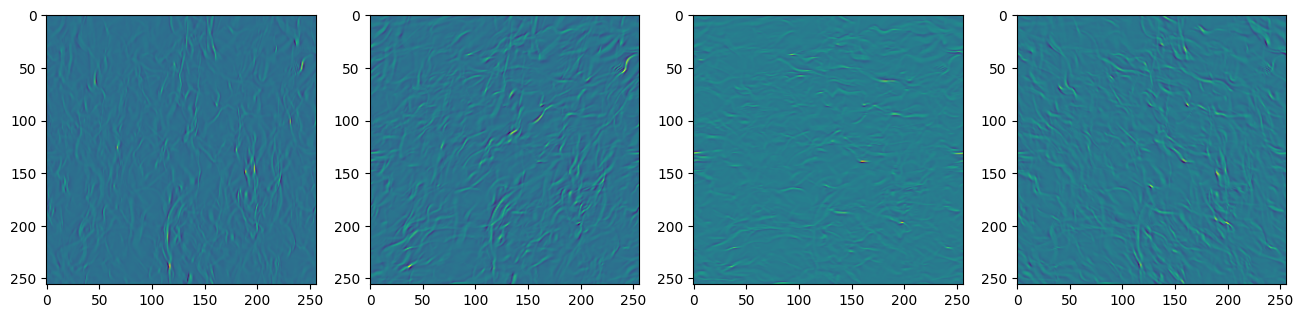

In [3]:
w_op=data.get_wavelet_op()

w_data = w_op.apply(data,0).array

plt.figure(figsize=(16,6))
for k in range(4):
    plt.subplot(1,4,1+k)
    plt.imshow(w_data[k].cpu().numpy().real)

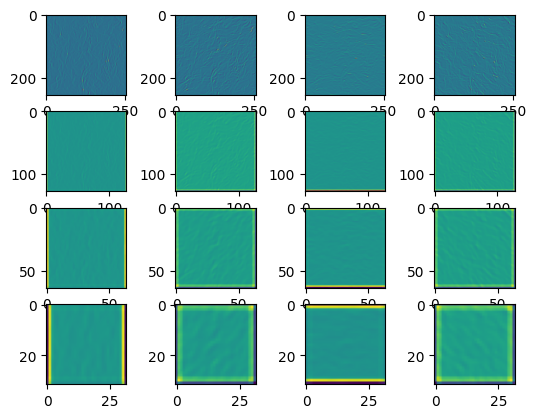

In [4]:
l_data=DataClass(im)
for j in range(4):
    w_data = w_op.apply(l_data,j).array
    for k in range(4):
        plt.subplot(4,4,1+k+4*j)
        plt.imshow(w_data[k].cpu().numpy().real)
    
    #l_data=w_op.apply_smooth(l_data,copy=True)
    l_data=l_data.downsample(j+1)

In [5]:
from ST_Operator import ST_Operator as STO

l_data=DataClass(im)

st_op=STO(l_data)

st_data = st_op.apply(l_data)

/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


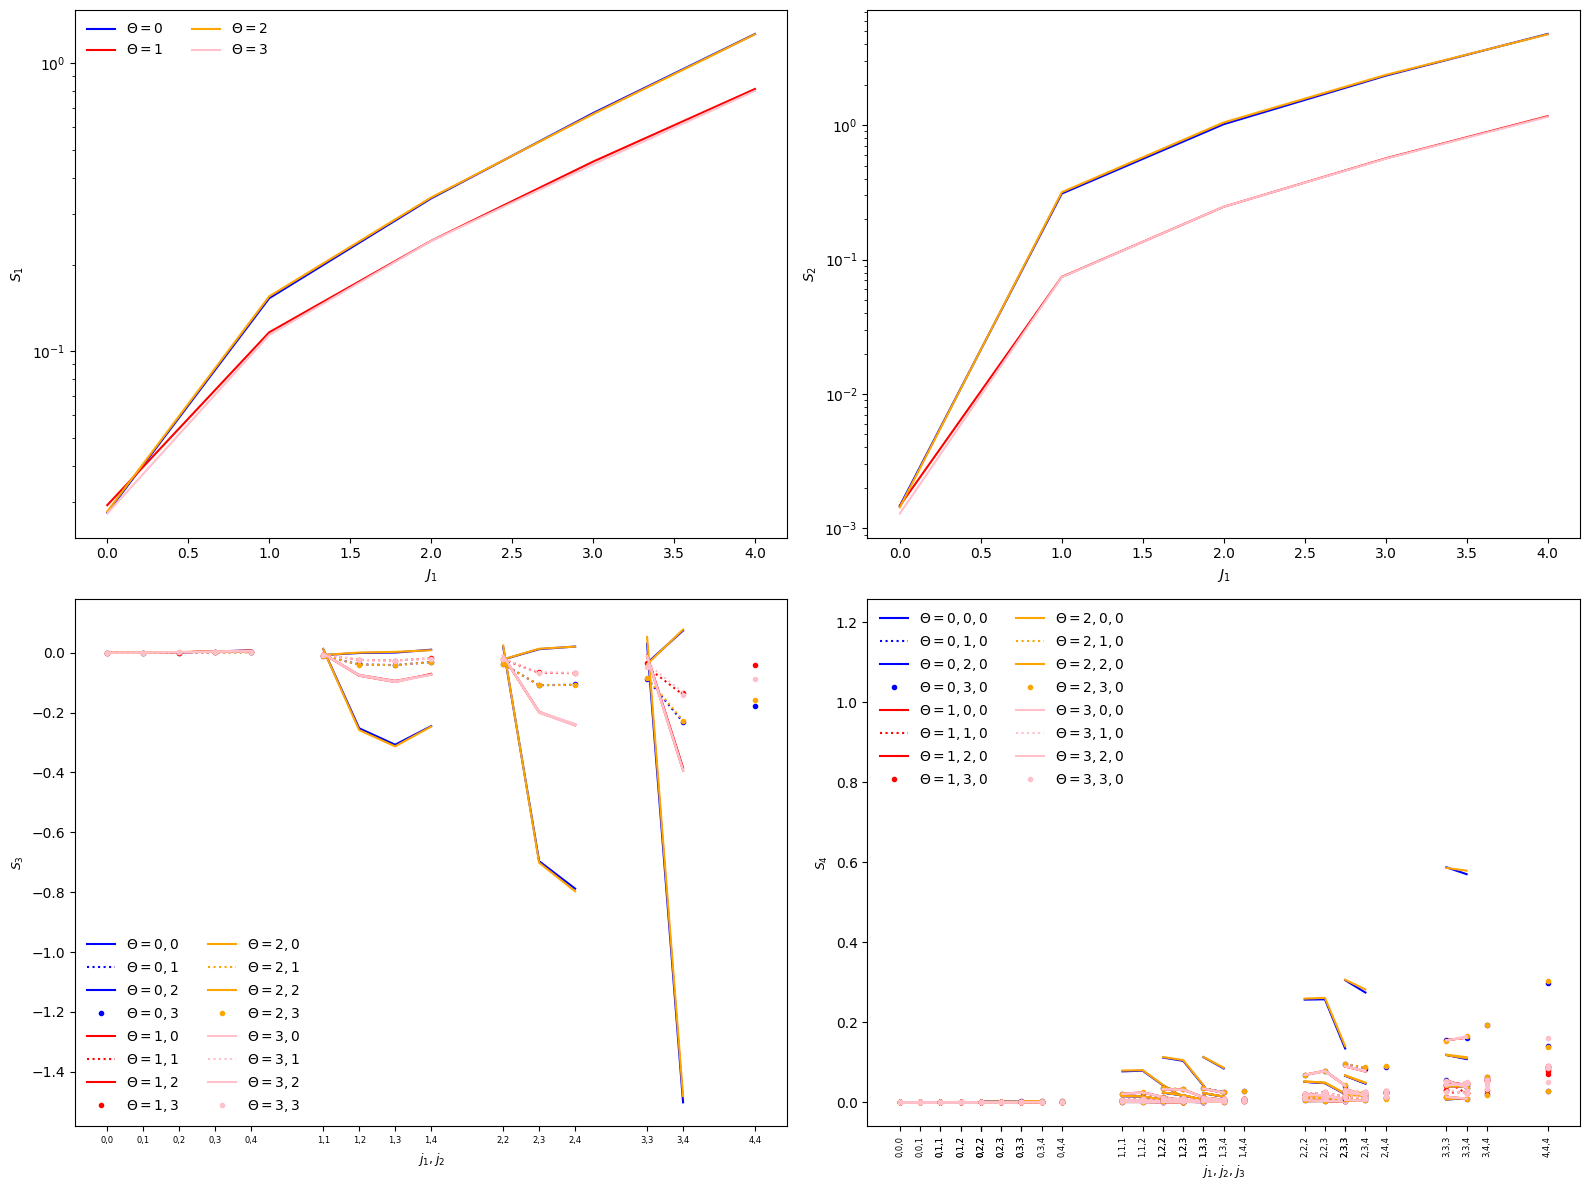

In [6]:
st_data.plot_coeff()

# do synthesis

In [7]:
st_data = st_op.apply(l_data)
st_data_norm = st_op.apply(l_data,norm='store_ref')

/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


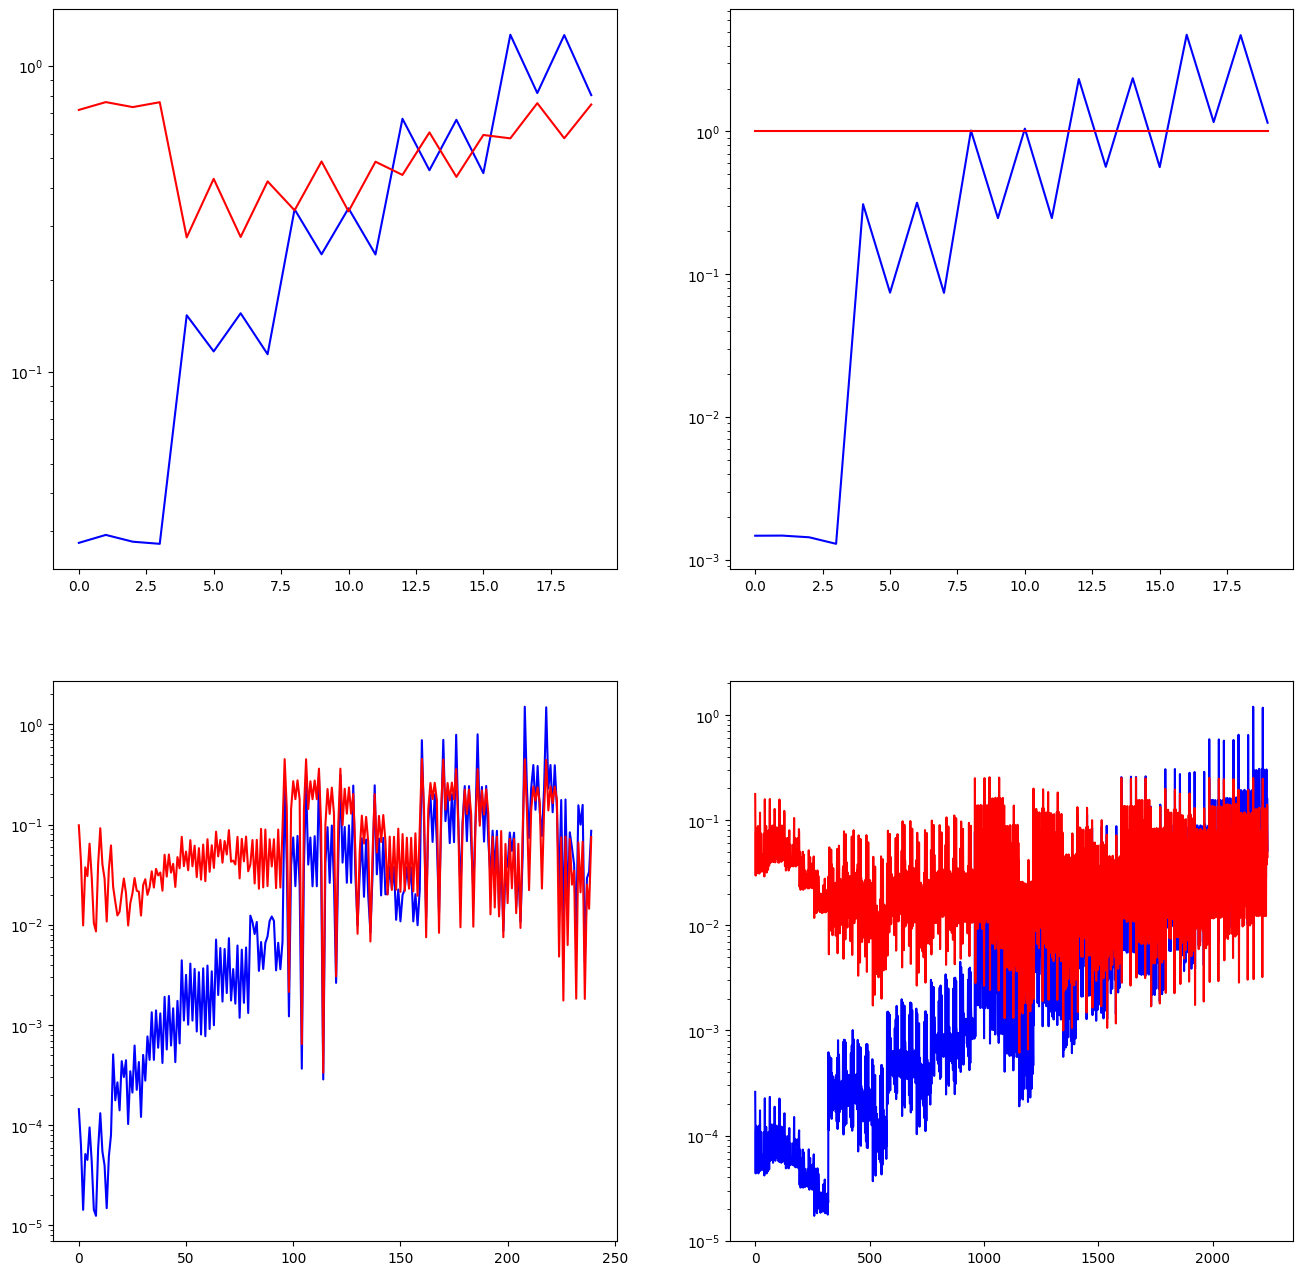

In [8]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.plot(st_data.S1.cpu().numpy().flatten(),color='b')
plt.plot(st_data_norm.S1.cpu().numpy().flatten(),color='r')
plt.yscale('log')
plt.subplot(2,2,2)
plt.plot(st_data.S2.cpu().numpy().flatten(),color='b')
plt.plot(st_data_norm.S2.cpu().numpy().flatten(),color='r')
plt.yscale('log')
def r_nan(x):
    return x[np.isfinite(x)]
plt.subplot(2,2,3)
plt.plot(r_nan(st_data.S3.abs().cpu().numpy().flatten()),color='b')
plt.plot(r_nan(st_data_norm.S3.abs().cpu().numpy().flatten()),color='r')
plt.yscale('log')
plt.subplot(2,2,4)
plt.plot(r_nan(st_data.S4.cpu().numpy().flatten()),color='b')
plt.plot(r_nan(st_data_norm.S4.cpu().numpy().flatten()),color='r')
plt.yscale('log')

# do synthesis

In [9]:
data = DataClass(im)
w_op = data.get_wavelet_op()

#Build the smooth version
target = w_op.apply_smooth(data).array.cpu().numpy()


torch.Size([256, 256]) torch.Size([1, 5, 5])


Text(0.5, 1.0, 'Target')

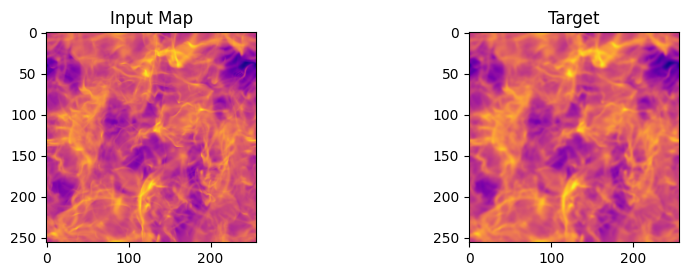

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.imshow(im,cmap='plasma')
plt.title('Input Map')
plt.subplot(2,2,2)
plt.imshow(target,cmap='plasma')
plt.title('Target')

In [15]:
u,histo = optimize_scattering_LBFGS(
        target,
        DataClass,
        SO,
        max_iter=100,
        lr=1.0,
        history_size=50,
        verbose=True,
    )

torch.Size([256, 256]) torch.Size([1, 5, 5])
[LBFGS] inner iter 1, loss = 1.225387e+04
[LBFGS] inner iter 2, loss = 1.225387e+04
[LBFGS] inner iter 3, loss = 1.225386e+04
[LBFGS] inner iter 4, loss = 1.225379e+04
[LBFGS] inner iter 5, loss = 1.225340e+04
[LBFGS] inner iter 6, loss = 1.224890e+04
[LBFGS] inner iter 7, loss = 1.217319e+04
[LBFGS] inner iter 8, loss = 9.075628e+03
[LBFGS] inner iter 9, loss = 8.219389e+03
[LBFGS] inner iter 10, loss = 6.916536e+03
[LBFGS] inner iter 11, loss = 1.268103e+05
[LBFGS] inner iter 12, loss = 6.914647e+03
[LBFGS] inner iter 13, loss = 6.391310e+03
[LBFGS] inner iter 14, loss = 3.192693e+03
[LBFGS] inner iter 15, loss = 2.681820e+03
[LBFGS] inner iter 16, loss = 2.236484e+03
[LBFGS] inner iter 17, loss = 1.416805e+03
[LBFGS] inner iter 18, loss = 1.159268e+03
[LBFGS] inner iter 19, loss = 1.010689e+03
[LBFGS] inner iter 20, loss = 8.663571e+02
[LBFGS] inner iter 21, loss = 7.648082e+02
[LBFGS] inner iter 22, loss = 7.208752e+02
[LBFGS] inner iter

Text(0.5, 1.0, 'Target')

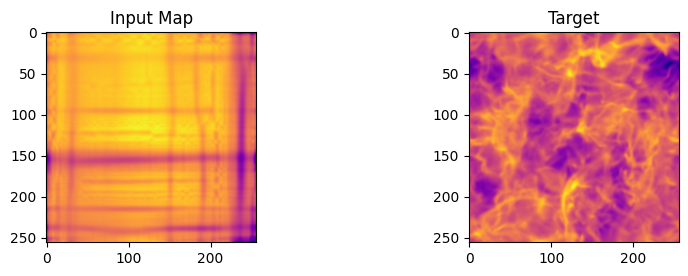

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.imshow(u.cpu().numpy(),cmap='plasma')
plt.title('Input Map')
plt.subplot(2,2,2)
plt.imshow(target,cmap='plasma')
plt.title('Target')